In [47]:
import utils.utils as utils
import localization, normalization
import cv2 as cv
import numpy as np

(280, 320)


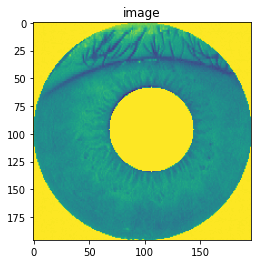

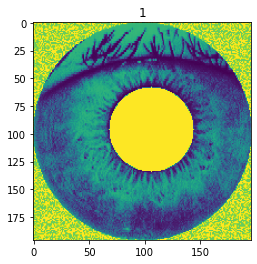

In [51]:
img = cv.imread('1.bmp',0)
img = utils.to_RGB(img)
rgb = img

inside = localization.inside_border(img)

outside = localization.outside_border(inside, img)
img = utils.to_gray(img)
cv.circle(rgb, (outside['y'], outside['x']), outside['r'], (255, 0, 0), 2)
pol = normalization.polar(inside, outside, img)

cut = normalization.cut(outside, img)

print(img.shape)

image = np.ones(img.shape, np.uint8)
cv.circle(image, (outside['y'], outside['x']), outside['r'], 255, -1)
cv.circle(image, (inside['y'], inside['x']), inside['r'], 0, -1)
cv.bitwise_not(image, image)
dst = np.zeros(img.shape, np.uint8)
cv.bitwise_or(img, image, dst)
iml = normalization.cut(outside, dst)

cv.imwrite('image.png', iml)
utils.show('image', iml)

image = np.zeros(iml.shape, np.uint8)
cv.equalizeHist(iml, image)
utils.show("1", image)

In [ ]:
# surf = cv.xfeatures2d.SURF_create(400)
# kp1, des1 = surf.detectAndCompute(pol,None)
# kp2, des2 = surf.detectAndCompute(cut,None)

# img1 = cv.drawKeypoints(pol,kp1,None,(255,0,0),4)
# img2 = cv.drawKeypoints(cut,kp2,None,(255,0,0),4)

# plt.imshow(img1),plt.show()
# plt.imshow(img2),plt.show()
# img2 =  cut
# sigma, theta, lambd, gamma = 10, 0, 3, 1
# kernel = cv.getGaborKernel((6 * sigma + 1, 6 * sigma + 1), sigma, theta, lambd, gamma, 0, 5);
# kernel2 = cv.getGaborKernel((6 * sigma + 1, 6 * sigma + 1), sigma, theta, lambd, gamma, math.pi/2, 5);
# imgplot = plt.imshow(kernel)
# plt.title('kernel')
# plt.show()
# imgplot = plt.imshow(kernel2)
# plt.title('kernel2')
# plt.show()
# dst = cv.filter2D(pol,-1,kernel)
# imgplot = plt.imshow(dst)
# plt.title('dst')
# plt.show()

# eps=1e-7
# numPoints = 200
# radius = 20
# lbp = feature.local_binary_pattern(dst, numPoints, radius, method="uniform")
# imgplot = plt.imshow(lbp)
# plt.title(" - ")
# plt.show()
    
# (hist, _) = np.histogram(lbp.ravel(),
# bins=np.arange(0, numPoints + 3),
# range=(0, numPoints + 2))
# hist = hist.astype("float")
# imgplot = plt.hist(hist)
# plt.title('hist')
# plt.show()
           